# Nicolás Torres-Echeverry:
# Homework 3 - Sampling & Reliability

Up until this week, we have assumed that the corpus you have used for analysis assignments represented a *meaningful* assemblage of texts from which reasonable inferences could be drawn about the social game, social world and social actors that produced it. 

This week, we ask you to build a corpus for preliminary analysis and articulate what your sample represents in context of your final project. We begin by exploring how we can get *human* readings of content at scale. We want to gather and utilize human responses for several reasons. First, we may want to use crowdsourced human scores as the primary method of coding, extracting or organizing content (as it was in two of the assigned readings). Second, we may want to validate or tune a computational algorithm we may have developed in terms of how it is associated with human meanings or experience. Finally, we may want to use human coding on a sample of data as the basis for training a model or algorithm to then extrapolate *human-like* annotations to the entire population. Here intelligent sampling is critical to maximize effective maching training. 

For this notebook we will be using the following packages

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch the Domain of your Project*</span>

In the two cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words) and **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words)? [**Note**: your individual or collective project can change over the course of the quarter if new data and/or analysis opportunities arise or if old ones fade away.]

## ***What?*** 

###    *What can computational content analysis teach us about the cultural context of reception that makes political candidates appealing or not?*


## ***Why?***

Studies on political rhetoric have centered on politicians and how politicians speak. We know less about the cultural context of reception and the conditions under which a politician's rhetoric is successful. This research centers on this context. By employing computational methods, it characterizes the reception context around politicians who participated in presidential elections in Latin America during 2010-2020.

## <span style="color:red">*Pitch Your Sample*</span>

In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).




I employ a Spanish corpus of 2 B words, approximately 2 M pages, and 200.000 websites. The corpus was collected in late 2015 from the websites of 21 countries in the region. The corpus provides data on how people were talking about politicians. Source: https://www.corpusdelespanol.org/web-dial/

What is hard here is:
1. To define what this corpus represents.
2. To deal with time and differentiate changes in time around the candidate.

Possible solutions:
1. Considering that the corpus might represent a distribution that skews towards higher income and educated people, and overrepresent the websites that appear more often in it, what matters in the **diversity** of the language in which the candidates'' names appear.
2. Maybe there are ways to deal with the issue of time and get a sense of the variation over time. Perhaps, I can track the latest date that appears in the text [taking into account that 2015 is the latest year that can show up]. 

The sample could be expanded using other web corpora like Sketch Engine, Corpora from the Web (COW - ESCOW14).

## <span style="color:red">*Your turn: Annotating text*</span>

Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides in the Assignment link on Canvas, or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

In [3]:
corpus = pandas.read_csv('2020_11_13_text_test.csv')

In [4]:
corpus.shape

(3868, 9)

In [5]:
corpus.columns

Index(['Unnamed: 0', 'Title', 'Genre', 'Country', 'Website', 'URL',
       'Number of words', 'Tokenized Words', 'Text'],
      dtype='object')

In [6]:
uribe = corpus[corpus["Text"].str.contains("Uribe")]
correa = corpus[corpus["Text"].str.contains("Correa")]
morales = corpus[corpus["Text"].str.contains("Evo Morales")]
bachelet = corpus[corpus["Text"].str.contains("Bachelet")]

In [7]:
print("uribe df:", uribe.shape)
print("correa df:", correa.shape)
print("evo df:", morales.shape)
print("bachelet df:", bachelet.shape)

uribe df: (12, 9)
correa df: (365, 9)
evo df: (19, 9)
bachelet df: (7, 9)


In [8]:
uribe["URL"]

425     http://blogs.monografias.com/editorial/2008/07...
714     http://ecuadorsincensura.blogspot.com/2008/06/...
739     http://ecuadorsincensura.blogspot.com/2010/01/...
789     http://el-ecuatoriano.blogspot.com/2008/03/jam...
941        http://fernandobalda.wordpress.com/2012/08/18/
1657    http://notioro.blogspot.com/2013/07/normal-0-2...
1827    http://politico.ec/de-prensa-banana-a-banana-l...
1940    http://revistazonalibre.blogspot.com/2012/11/c...
2183    http://www.180latitudes.org/analisis/reflexion...
2188    http://tinku.org/la-colombia-que-sangra-y-resi...
2190    http://tinku.org/para-cortarle-alas-al-golpism...
2215        http://tripamishqui.com/category/carlos-vera/
Name: URL, dtype: object

In [9]:
correa["URL"]

1       http://acoso-textual.blogspot.com/2011/04/varg...
31                      http://accionyreaccion.com/?p=565
36                      http://accionyreaccion.com/?p=644
62      http://alejo-ab-intra.blogspot.com/2010/09/man...
113     http://andresmartinez.wordpress.com/2011/04/14...
                              ...                        
3826    http://www.vicepresidencia.gob.ec/austria-coop...
3829    http://www.vicepresidencia.gob.ec/ecuatorianos...
3830    http://www.vicepresidencia.gob.ec/el-primer-ci...
3832    http://www.vicepresidencia.gob.ec/entrega-de-p...
3838    http://www.vivedeporte.com/2013/05/29/se-super...
Name: URL, Length: 365, dtype: object

In [10]:
morales["Text"][1772]

'El Presidente del Estado , Evo Morales , denunció en su discurso de el 6 de agosto , pronunciado desde Cochabamba , que en el país existen medios de comunicación chilenos que provocan conflictos internos . Aunque no especificó qué medios serían propiedad de Chile o de capitales chilenos en Bolivia , Morales dijo que su actividad ayuda a incentivar las discrepancias políticas internas . El Presidente hizo esa afirmación cuando se refería a la demanda boliviana contra su vecino en la Corte Internacional de Justicia en La Haya . El discurso presidencial sirvió también para atribuir a los medios de comunicación las fallas de información de el Instituto Nacional de Estadísticas ( INE ) que entregó , mediante el Presidente , en enero de este año , datos sobre el crecimiento y la distribución poblacional que seis meses después resultaron errados . Morales dijo que como los medios hicieron insinuaciones , entonces el gobierno decidió adelantar los datos preliminares . \r\n'

In [11]:
bachelet["Text"][1999]

'En Chile entre 1990 y 2006 hemos observado una disminución en la pobreza . Sin embargo , en los últimos cinco años ésta se ha estancado en torno a el 15 % . Históricamente ha existido una mayor proporción de mujeres pobres que de hombres pobres , aun después de ajustar los datos a el hecho de que en Chile hay ligeramente más mujeres que hombres . Sin embargo , esta tendencia se dispara en el año 2006 , se mantiene durante el período de la Presidenta Bachelet y alcanza niveles record en los últimos dos años . Según la Casen 2011 entre las personas pobres 1.074.455 eran hombres y 1.372.899 mujeres , casi 28 % de mayor pobreza entre las mujeres . ¿ Por qué está pasando esto en Chile ? Una posible explicación es la escolaridad , pero encontramos que entre los pobres las mujeres y los hombres tienen niveles de escolaridad muy parecidos ( 9,7 y 9,5 años respectivamente ) . Otra posible respuesta es comparar los hogares . En los hogares pobres más de la mitad tiene jefa de hogar y de éstas ,

## ***Coding procedure***

I asked 10 codders in Mechanical Turk to code four fragments like the ones above. Coders had to reply to two questions: 

    1) On a scale from -2 to 2, -2 being very negative to 2 being very positive, what is the value assesment in the excerpt about politician XXXX? 

    2) From a scale of 0 to 5, where 0 is no certainty and 5 is complete certainty, how certain is the excerpt regarding the claims it makes about politician XXXX?  

In [12]:
header_list = ["Time", "Correa value", "Correa certainty", "Uribe value", "Uribe certainty", \
               "Morales value", "Morales certainty", "Bachelet value", "Bachelet certainty"]
survey = pandas.read_csv("survey_results.csv", names=header_list)
survey = survey.reset_index()
survey = survey.drop([0])
survey_val = survey.drop(columns=["index", "Time", "Correa certainty", "Uribe certainty", \
                                  "Morales certainty", "Bachelet certainty"])
survey_cert = survey[["Correa certainty", "Uribe certainty", 
                    "Morales certainty", "Bachelet certainty"]]

In [13]:
survey_val # ranges from -2 to 2

,Correa value,Uribe value,Morales value,Bachelet value
1,-2,-1,-2,0
2,-2,-1,0,0
3,-2,-1,-1,-1
4,-2,-2,1,1
5,2,2,1,0
6,0,1,-2,-1
7,2,2,2,2
8,-2,-2,0,0
9,-2,-2,0,0
10,2,2,2,0


In [14]:
survey_cert # ranges from 0 to 5

,Correa certainty,Uribe certainty,Morales certainty,Bachelet certainty
1,5,4,4,2
2,3,2,3,4
3,5,5,4,0
4,0,5,3,3
5,5,5,5,5
6,3,5,0,2
7,5,5,5,5
8,5,4,5,2
9,5,4,5,2
10,5,5,5,0


In [15]:
survey_val_np = survey_val.to_numpy(dtype=np.float64)
survey_cert_np = survey_cert.to_numpy(dtype=np.int32)

In [16]:
# transposing rows  
survey_val_np = survey_val_np.T
survey_cert_np = survey_cert_np.T

In [17]:
annot_val = AnnotationsContainer.from_array(survey_val_np, missing_values=[99])
annot_cert = AnnotationsContainer.from_array(survey_cert_np, missing_values=[99])

In [18]:
print(annot_val.labels)
print(annot_cert.labels)
print(annot_val.missing_values)
print(annot_cert.missing_values)

[-2.0, -1.0, 0.0, 1.0, 2.0]
[0, 2, 3, 4, 5]
[]
[]


In [19]:
annot_val.annotations # I don't understand why it changed the codes

array([[0, 0, 0, 0, 4, 2, 4, 0, 0, 4, 0],
       [1, 1, 1, 0, 4, 3, 4, 0, 0, 4, 0],
       [0, 2, 1, 3, 3, 0, 4, 2, 2, 4, 2],
       [2, 2, 1, 3, 2, 1, 4, 2, 2, 2, 2]])

In [20]:
annot_cert.annotations # I don't understand why it changed the codes

array([[4, 2, 4, 0, 4, 2, 4, 4, 4, 4, 4],
       [3, 1, 4, 4, 4, 4, 4, 3, 3, 4, 4],
       [3, 2, 3, 2, 4, 0, 4, 4, 4, 4, 4],
       [1, 3, 0, 2, 4, 1, 4, 1, 1, 0, 0]])

In [21]:
pyanno.measures.agreement.labels_frequency(annot_val.annotations,5)

array([0.29545455, 0.13636364, 0.27272727, 0.09090909, 0.20454545])

**There isn't that much aggreement between codders. Specially not for codding the fragment on Evo Morales (index 2 in the array). The codding for Correa and Uribe (idexes 0 and 1) is higher. The heatmaps below comparing two ussers for each of the two questions show that the agreement between them was low.**

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 1.]]


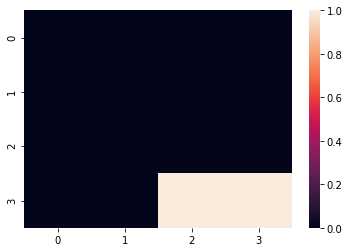

In [22]:
c = pyanno.measures.agreement.confusion_matrix(annot_val.annotations[:,3], annot_val.annotations[:,4],4)
print(c)
ac = seaborn.heatmap(c)
plt.show()

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]


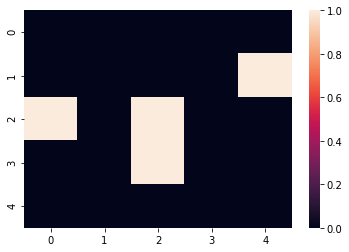

In [23]:
c = pyanno.measures.agreement.confusion_matrix(annot_cert.annotations[:,1], annot_cert.annotations[:,3],5)
print(c)
ac = seaborn.heatmap(c)
plt.show()

***Using Cohen's kappa shows that codder five is an outlier, while codders seven and eight tend to agree.***

/Users/nte/Documents/CCA2021/venv/lib/python3.8/site-packages/pyanno/measures/helpers.py:166: RuntimeWarning: invalid value encountered in double_scalars
  return (observed_agreement - chance_agreement) / (1. - chance_agreement)


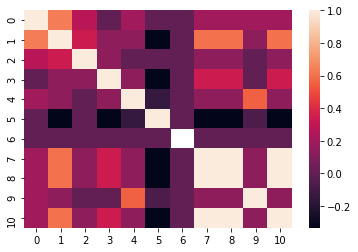

In [24]:
m = pairwise_matrix(cohens_kappa, annot_val.annotations)
ax = seaborn.heatmap(m)
plt.show()

In [25]:
pairwise_metric_average(cohens_weighted_kappa,annot_val.annotations)

0.15119217383923264

/Users/nte/Documents/CCA2021/venv/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/nte/Documents/CCA2021/venv/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


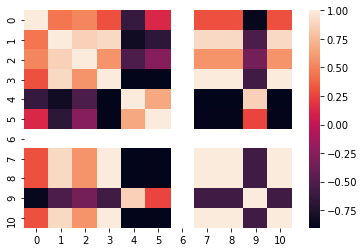

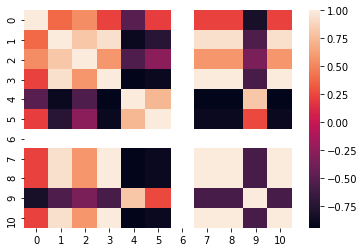

In [26]:
n = pairwise_matrix(pearsons_rho, annot_val.annotations)
m = pairwise_matrix(spearmans_rho, annot_val.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [27]:
def makeQuestionComparison(model, anno_target, num_questions = 20):
    votes = []
    for r in anno_target.annotations:
        v = [0] * len(anno_target.labels)
        votes.append(v)
        for a in r:
            if a > -1:
                v[a] += 1
    votes_array = np.array(votes)
    posterior = model.infer_labels(anno_target.annotations)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)

    seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
    seaborn.heatmap(np.nan_to_num(posterior,0)[:num_questions], annot=True, ax =ax1)
    ax1.set_title("Model")
    ax2.set_title("Votes")
    return fig, (ax1, ax2)

## <span style="color:red">*Your turn: Models*</span>

In the cells immediately following, use the results of your content annotation survey to predict **high and low-quality analysts**, then predict MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

In [28]:
annot_val.annotations

array([[0, 0, 0, 0, 4, 2, 4, 0, 0, 4, 0],
       [1, 1, 1, 0, 4, 3, 4, 0, 0, 4, 0],
       [0, 2, 1, 3, 3, 0, 4, 2, 2, 4, 2],
       [2, 2, 1, 3, 2, 1, 4, 2, 2, 2, 2]])

In [29]:
model_b = ModelB.create_initial_state(5, 11)
model_b.map(annot_val.annotations)

/Users/nte/Documents/CCA2021/venv/lib/python3.8/site-packages/pyanno/util.py:80: RuntimeWarning: divide by zero encountered in log
  log_theta = ninf_to_num(log(theta))


In [30]:
posterior = model_b.infer_labels(annot_val.annotations)

votes = []
for r in annot_val.annotations:
    v = [0] * len(annot_val.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)

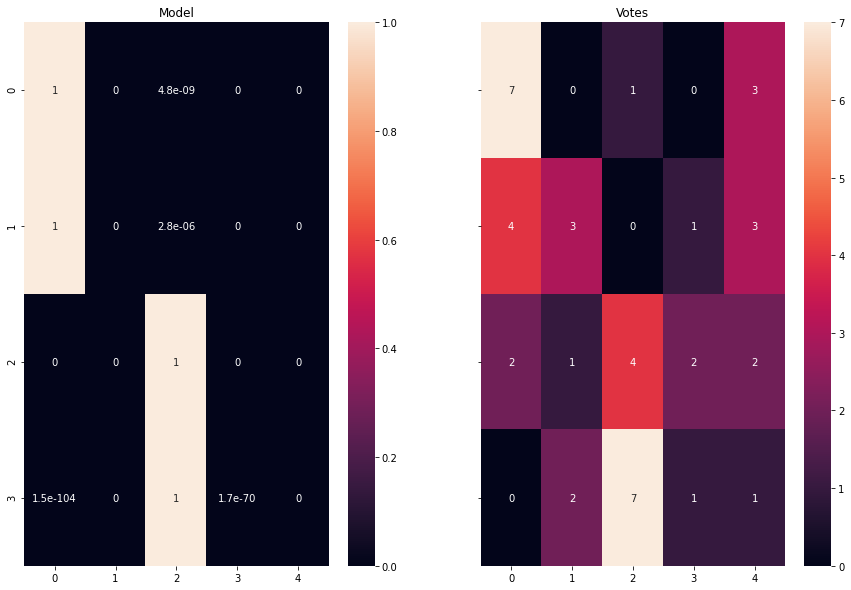

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 7

seaborn.heatmap(votes_array[:num_questions], annot= True, ax=ax2)
seaborn.heatmap(posterior[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Votes")
plt.show()

In [32]:
model_bt = ModelBt.create_initial_state(5, 11)
model_bt.mle(annot_val.annotations)
samples = model_bt.sample_posterior_over_accuracy(annot_val.annotations, 200, burn_in_samples=100, thin_samples=3)

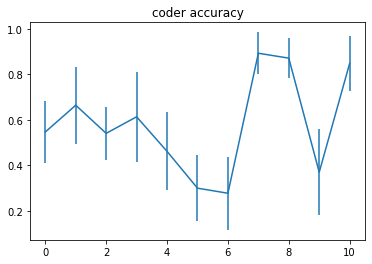

In [33]:
y =  samples.mean(axis=0)
y_ci = samples.std(axis=0)
plt.figure()
plt.title('coder accuracy')
plt.errorbar(range(11),y, yerr = y_ci)
plt.show()